# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

In [62]:
# mount google drive in to your Colab enviornment
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd /content/drive/MyDrive/AI_assignment/


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
import pandas as pd
import numpy as np
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [ ]:
car_data.head()

In [ ]:
car_data['CarName'].unique()

In [ ]:
#check if there are empty cells, if there are then row and column indexes will be returned where values are empty or missing
np.where(car_data.applymap(lambda x: x ==''))

In [ ]:
car_data.isnull().any()

In [ ]:
# correct the name error in audi 100 ls
car_data.iloc[3,2] = 'audi 100ls'

In [ ]:
car_data.dtypes

In [ ]:
car_data.drop(columns=['car_ID'], inplace = True)

In [63]:
# get columns so that we can use the column names for onehot encoding of catagorical featrues in next cell
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [64]:
# onehot encode all catagorical columns
final_car = pd.get_dummies(car_data, columns=['CarName','symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)


In [65]:
final_car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [66]:
#check statistical data to see abnormal values and outliers
final_car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
#initialize a seed value so that each time we can get the same random number sequence, it will help us  as a team
# working on a common project to work on the same random data. Each new seed will generate a particular sequnce
#of random number. You can choose any seed value here of your choice
# 0.72 means we have taken 72% values for training set as we will make 72/4 = 18 rows of k fold validation data, where
# value of k will be 4 when we compile and fit our model for validation
np.random.seed(11111)
msk = np.random.rand(len(final_car)) < 0.72
train_total = final_car[msk]
test_total = final_car[~msk]


In [68]:
#check the length of our test and train datasets
print(len(train_total))
print(len(test_total))


141
64


In [69]:
train_total.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,...,0,0,0,0,0,0,0,1,0,0
11,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,0,0,0,0,0,0,0,1,0,0


In [70]:
# check statistical overview if there are some outliers and abnormal values
train_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,...,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,98.692199,173.658156,65.875887,53.648227,2546.787234,125.666667,3.324184,3.256809,10.070355,103.702128,...,0.0,0.007092,0.028369,0.326241,0.021277,0.092199,0.007092,0.453901,0.035461,0.007092
std,6.005665,12.320089,2.188604,2.508204,529.769152,41.733451,0.266123,0.296387,3.868579,38.424275,...,0.0,0.084215,0.166616,0.470508,0.144819,0.290337,0.084215,0.499645,0.185601,0.084215
min,86.600000,144.600000,61.800000,47.800000,1713.000000,70.000000,2.680000,2.190000,7.000000,55.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.000000,51.600000,2128.000000,97.000000,3.150000,3.150000,8.500000,70.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.500000,172.400000,65.400000,53.900000,2410.000000,110.000000,3.310000,3.290000,9.000000,95.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,180.300000,66.600000,55.500000,2952.000000,141.000000,3.580000,3.400000,9.400000,116.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,115.600000,202.600000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
print(train_total.dtypes)

wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 194, dtype: object


In [72]:
# get our price labels and store in another dataframe
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [73]:
train_label

1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 141, dtype: float64

In [74]:
# drop price from oroginal training and test dataset , as price is not needed there
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [75]:
train_data.shape

(141, 193)

In [76]:
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,1,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,1,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,1,0,0,0,0


In [77]:
#get indices of the columns so that we can know how many columns we have to normalize, as catagorical columns which we
# have added with onehot encoding, do not need to be normalized.. normalizing will be done in next cell
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_alfa-romero Quadrifoglio',
 14: 'CarName_alfa-romero giulia',
 15: 'CarName_alfa-romero stelvio',
 16: 'CarName_audi 100ls',
 17: 'CarName_audi 4000',
 18: 'CarName_audi 5000',
 19: 'CarName_audi 5000s (diesel)',
 20: 'CarName_audi fox',
 21: 'CarName_bmw 320i',
 22: 'CarName_bmw x1',
 23: 'CarName_bmw x3',
 24: 'CarName_bmw x4',
 25: 'CarName_bmw x5',
 26: 'CarName_bmw z4',
 27: 'CarName_buick century',
 28: 'CarName_buick century luxus (sw)',
 29: 'CarName_buick century special',
 30: 'CarName_buick electra 225 custom',
 31: 'CarName_buick opel isuzu deluxe',
 32: 'CarName_buick regal sport coupe (turbo)',
 33: 'CarName_buick skyhawk',
 34: 'CarName_buick skylark',
 35: 'CarName_chevrolet impala',
 36: 'CarName_chevrolet monte carlo',
 37: 'CarNam

In [78]:
## we normalize data because data has big vlaues in decimal and it will worsen performance of our model, may overfit 
## or  we may face hardware resource high usage
# we will apply the formula normalized_train_data = (train_data - mean)/ stadrad_deviation
## firt take mean of training, then subtract mean from each value of the array slice train_data.iloc[:,0:13]
mean = train_data.iloc[:,0:13].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std



In [79]:
mean

wheelbase             98.692199
carlength            173.658156
carwidth              65.875887
carheight             53.648227
curbweight          2546.787234
enginesize           125.666667
boreratio              3.324184
stroke                 3.256809
compressionratio      10.070355
horsepower           103.702128
peakrpm             5143.971631
citympg               25.113475
highwaympg            30.581560
dtype: float64

In [80]:
std

wheelbase             6.005665
carlength            12.320089
carwidth              2.188604
carheight             2.508204
curbweight          529.769152
enginesize           41.733451
boreratio             0.266123
stroke                0.296387
compressionratio      3.868579
horsepower           38.424275
peakrpm             474.472458
citympg               6.509435
highwaympg            6.734937
dtype: float64

In [81]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label


In [82]:
mean_label

13379.132390070921

In [83]:
std_label

8189.49456801062

In [84]:
print(mean_label)

13379.132390070921


In [85]:
test_label

0      0.014148
10     0.372534
14     1.365880
15     2.122337
18    -1.004718
         ...   
192    0.056886
193   -0.132991
194   -0.053621
196    0.318196
198    0.615529
Name: price, Length: 64, dtype: float64

In [86]:
train_data.shape

(141, 193)

In [87]:
#store in numpy array

In [88]:
test = np.array(test_data.iloc[:]).astype('float32')

In [89]:
train = np.array(train_data.iloc[:]).astype('float32')

In [90]:
test_l= np.array(test_label.astype('float32'))

In [91]:
train_l= np.array(train_label.astype('float32'))

In [92]:
train.shape[1]


193

In [93]:
(141,192)[1]

192

In [94]:
train.dtype

dtype('float32')


# Models section
```
#WE will configure different models here according to relu, tanh , regularization, dropout etc..
```



In [107]:
# we are passing activation function as a parameter here so that we can call this function with tanh or relu while
# fitting and training the model
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model(act):
    model = models.Sequential()
    model.add(layers.Dense(128, activation= act,input_shape=(train.shape[1],)))
    model.add(layers.Dense(64, activation= act))
    model.add(layers.Dense(32, activation= act))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [96]:
build_model('relu').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               24832     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [97]:
build_model('tanh').summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               24832     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


In [109]:
# Regularized model
from tensorflow.keras import regularizers
def build_model_regular(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
    model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [99]:
build_model_regular('tanh').summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                1940      
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 2,089
Trainable params: 2,089
Non-trainable params: 0
_________________________________________________________________


In [110]:
# dropout model
from tensorflow.keras import regularizers
def build_model_drop(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [101]:
build_model_drop('relu').summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                1940      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

# K Fold validation section
## here we will use len(train)//k to make 141//4 = 36 rows for validation in each validation test and collect the validation scores for relu , tanh , regularization , and dropout

In [102]:
#k fold validation with relu
# 141/4
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [113]:
# 141/4
#k fold validation with tanh
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model('tanh')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [111]:
#k-fold validtion with regularization
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model_regular('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [112]:
#k-fold validtion with dropout
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model_drop('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
106/106 [==============================] - 1s 2ms/step - loss: 1.1847 - mae: 0.7896
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 1.4208 - mae: 0.7771
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 1.0021 - mae: 0.6060
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6148 - mae: 0.4815
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.7085 - mae: 0.5719
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 1.1691 - mae: 0.6858
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6732 - mae: 0.4877
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6114 - mae: 0.5215
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5321 - mae: 0.5104
Epoch 10/100
106/106 [==============================] - 0s 2ms/step - loss: 0.5713 - mae: 0.5060
Epoch 11/100
106/10

106/106 [==============================] - 0s 2ms/step - loss: 0.3732 - mae: 0.2873
Epoch 86/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2061 - mae: 0.3081
Epoch 87/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1592 - mae: 0.2569
Epoch 88/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1554 - mae: 0.2551
Epoch 89/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2572 - mae: 0.2944
Epoch 90/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1685 - mae: 0.2599
Epoch 91/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2219 - mae: 0.2758
Epoch 92/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2401 - mae: 0.2748
Epoch 93/100
106/106 [==============================] - 0s 1ms/step - loss: 0.3479 - mae: 0.3249
Epoch 94/100
106/106 [==============================] - 0s 1ms/step - loss: 0.2733 - mae: 0.2827
Epoch 95/100
106/106 [=====================

106/106 [==============================] - 0s 2ms/step - loss: 0.1972 - mae: 0.3006
Epoch 69/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1946 - mae: 0.2695
Epoch 70/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2189 - mae: 0.2905
Epoch 71/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1521 - mae: 0.2369
Epoch 72/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2049 - mae: 0.2999
Epoch 73/100
106/106 [==============================] - 0s 2ms/step - loss: 0.0871 - mae: 0.2365
Epoch 74/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5085 - mae: 0.3731
Epoch 75/100
106/106 [==============================] - 0s 1ms/step - loss: 0.0920 - mae: 0.2084
Epoch 76/100
106/106 [==============================] - 0s 1ms/step - loss: 0.1405 - mae: 0.2637
Epoch 77/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2422 - mae: 0.2980
Epoch 78/100
106/106 [=====================

106/106 [==============================] - 0s 2ms/step - loss: 0.1684 - mae: 0.2532
Epoch 52/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2384 - mae: 0.3038
Epoch 53/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2277 - mae: 0.2225
Epoch 54/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3782 - mae: 0.3408
Epoch 55/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1238 - mae: 0.2488
Epoch 56/100
106/106 [==============================] - 0s 2ms/step - loss: 0.4152 - mae: 0.3943
Epoch 57/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2350 - mae: 0.2667
Epoch 58/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1977 - mae: 0.2852
Epoch 59/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3017 - mae: 0.3600
Epoch 60/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1532 - mae: 0.2550
Epoch 61/100
106/106 [=====================

106/106 [==============================] - 0s 2ms/step - loss: 0.2292 - mae: 0.2921
Epoch 34/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1507 - mae: 0.2660
Epoch 35/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3679 - mae: 0.4132
Epoch 36/100
106/106 [==============================] - 0s 3ms/step - loss: 0.1989 - mae: 0.3035
Epoch 37/100
106/106 [==============================] - 0s 3ms/step - loss: 0.2521 - mae: 0.3466
Epoch 38/100
106/106 [==============================] - 0s 2ms/step - loss: 0.2089 - mae: 0.2958
Epoch 39/100
106/106 [==============================] - 0s 2ms/step - loss: 0.5220 - mae: 0.4458
Epoch 40/100
106/106 [==============================] - 0s 2ms/step - loss: 0.5635 - mae: 0.4531
Epoch 41/100
106/106 [==============================] - 0s 2ms/step - loss: 0.1919 - mae: 0.3008
Epoch 42/100
106/106 [==============================] - 0s 2ms/step - loss: 0.3523 - mae: 0.4083
Epoch 43/100
106/106 [=====================

# Scores
## here we will see  MAE mean absolute Error scores of all model which we have saved in the list during each training in above section

In [114]:
all_scores_relu

[0.31573009490966797,
 0.3618714213371277,
 0.3587171137332916,
 0.28285616636276245]

In [115]:
all_scores_tanh

[0.3072701096534729,
 0.3145953118801117,
 0.4233860373497009,
 0.31090790033340454]

In [116]:
all_scores_regular

[0.30885595083236694,
 0.23671109974384308,
 0.32561731338500977,
 0.3531477749347687]

In [117]:
all_scores_drop

[0.365698903799057,
 0.49885979294776917,
 0.3179728090763092,
 0.28388258814811707]

# training on the training data
## here we will call each model separately from Models section and train on the training data and evaluate on the test data

In [118]:

model_tanh = build_model('tanh')
model_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)

2/2 [==============================] - 0s 4ms/step - loss: 0.1062 - mae: 0.2491


In [119]:
model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)

2/2 [==============================] - 0s 3ms/step - loss: 0.0905 - mae: 0.2389


In [120]:
model_regular = build_model_regular('relu')
model_regular.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test, test_l)

2/2 [==============================] - 0s 4ms/step - loss: 0.1781 - mae: 0.2799


In [121]:
model_drop = build_model_drop('relu')
model_drop.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test, test_l)

2/2 [==============================] - 0s 3ms/step - loss: 0.1294 - mae: 0.3167


# Prediction Section
## here we will predict our prices of our test dataset with each model which we have trained in training section
## Note that here we will use the reverse process of Normalization to retrieve our values of price in thousand of dollars i.e. x = (y - mean)/ std ==>> we will calculate( y = x * std + mean) and then we will compare it with our target values

In [122]:
test_l

array([ 0.01414832,  0.3725343 ,  1.3658801 ,  2.122337  , -1.004718  ,
       -0.7045773 , -0.5886972 , -0.97443527, -0.763189  , -0.52312535,
       -0.05301089, -0.3704908 , -0.5449216 , -0.80397296, -0.5536523 ,
       -0.26059392,  0.6062484 ,  1.4864004 ,  2.5404336 ,  3.367835  ,
       -0.8779702 , -0.09159691,  0.18192424, -0.7802841 , -0.50065756,
       -0.9622245 , -0.6813769 , -0.5409531 ,  0.01463675,  0.12453365,
        0.46643507, -0.1806134 ,  0.2687428 ,  0.4299249 ,  0.45129374,
       -0.07511237,  2.3382235 ,  2.200547  , -0.49870384,  0.20280465,
        0.26019526, -0.68430746, -0.7224051 , -0.65524584, -0.98066276,
       -0.7889537 , -0.7547636 , -0.6888255 , -0.6277716 , -0.4983375 ,
       -0.6020069 , -0.4139611 , -0.22347318, -0.54107517,  0.28217462,
       -0.68430746, -0.6574438 , -0.59638995, -0.01027321,  0.056886  ,
       -0.1329914 , -0.05362143,  0.3181964 ,  0.6155285 ], dtype=float32)

In [123]:
def predict(model, m):
    print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
    return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")


In [124]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[20640.715]] '

In [125]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[22412.953]] '

In [126]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[24307.941]] '

In [127]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 24565.000309357747 


' the predicted Price was : [[19978.277]] '

In [128]:
def plot_fn(mod):
    y_true = test_l* std_label + mean_label
    y_pred = mod.predict(test) * std_label + mean_label
    return y_true , y_pred.flatten()

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
    y_true, y_pred = plot_fn(mod)
    coef = np.polyfit(y_true,y_pred,1)
    poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
    plt.figure()
    plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
    plt.title(label)
    plt.xlabel('Thousand Dollar True' )
    plt.ylabel('Thousand Dollar Predictions' )
    plt.xlim(0, 50000)
    plt.ylim(0, 50000)

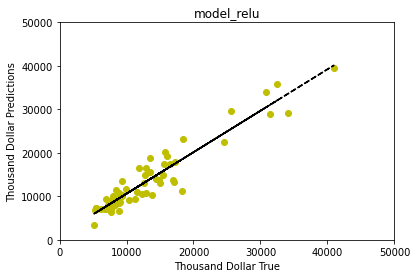

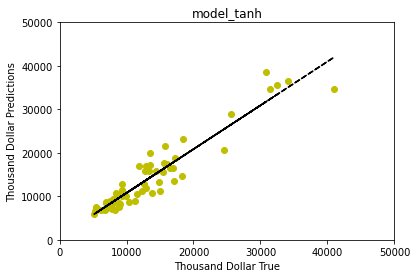

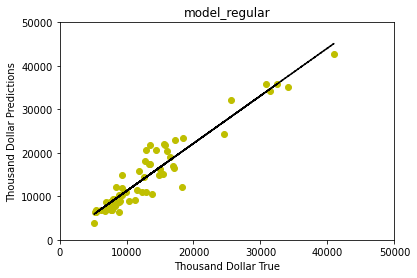

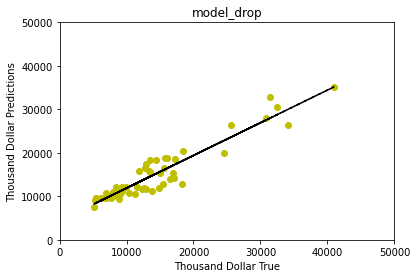

In [131]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
    list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
    plot_list.append(plotting(j,list_name[i]))